In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori , association_rules

In [155]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
"Dealing with the Nan Values"
df = data.fillna('hussain').values
row = []
list_of_rows = [row for row in df]
dataset=[]
for indv_list in list_of_rows:
    lst_cleaning=[x for x in indv_list if x!='hussain']
    dataset.append(lst_cleaning)
print(dataset[:10])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries']]


In [157]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding(True/false instead of 0s/1s) on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Probability')

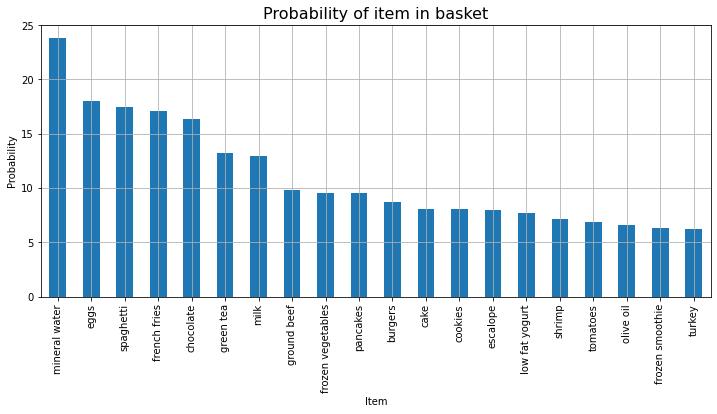

In [158]:
" Visualizing the Most purchased items "
support = df.mean()
support.sort_values()
(100*support.sort_values(ascending=False))[:20].plot(kind='bar',grid=True,figsize = (12,5))
plt.title("Probability of item in basket",fontsize = 16)
plt.xlabel('Item')
plt.ylabel('Probability')

In [159]:
"Apriori Algorithm"
freq_itemsets=apriori(df, min_support=0.035,use_colnames=True, verbose=1)
freq_itemsets.sort_values(by="support").reset_index(drop=True)

Processing 30 combinations | Sampling itemset size 3


,support,itemsets
0,0.035462,"(spaghetti, milk)"
1,0.035729,"(frozen vegetables, mineral water)"
2,0.036395,"(french fries, eggs)"
3,0.036528,"(eggs, spaghetti)"
4,0.039195,"(spaghetti, ground beef)"
5,0.039195,"(spaghetti, chocolate)"
6,0.040928,"(mineral water, ground beef)"
7,0.042528,(salmon)
8,0.043061,(fresh bread)
9,0.046794,(champagne)


In [160]:
association_rules(freq_itemsets,metric="confidence",min_threshold=0.1).sort_values(by='confidence',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
1,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
2,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
4,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
6,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
7,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
8,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
9,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581


In [161]:
association_rules(freq_itemsets,metric="lift",min_threshold=1).sort_values(by='lift',ascending=False).reset_index(drop=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(ground beef),0.174110,0.098254,0.039195,0.225115,2.291162,0.022088,1.163716
1,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
2,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
3,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
4,(mineral water),(frozen vegetables),0.238368,0.095321,0.035729,0.149888,1.572463,0.013007,1.064189
5,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
6,(spaghetti),(milk),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043
7,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
8,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
9,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850


In [162]:
" the frequently sold together items are (spaghetti), (ground beef) , and (mineral water)	"

' the frequently sold together items are (spaghetti), (ground beef) , and (mineral water)\t'

In [163]:
"the small dataset"
datasets = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
datasets

[['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
 ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
 ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
 ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
 ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [164]:
te=TransactionEncoder()
te_ary=te.fit(datasets).transform(datasets)    #Apply one-hot-encoding(True/false instead of 0s/1s) on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


Text(0, 0.5, 'Probability')

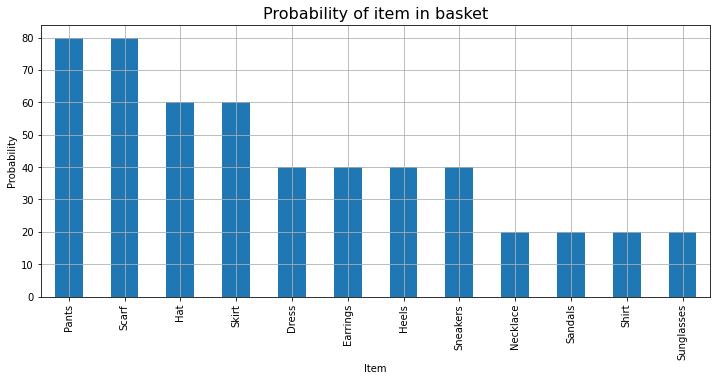

In [165]:
" Visualizing the Most purchased items "
support = df.mean()
support.sort_values()
(100*support.sort_values(ascending=False))[:20].plot(kind='bar',grid=True,figsize = (12,5))
plt.title("Probability of item in basket",fontsize = 16)
plt.xlabel('Item')
plt.ylabel('Probability')

In [166]:
"Apriori Algorithm"
freq_itemsets=apriori(df, min_support=0.03,use_colnames=True, verbose=1)
freq_itemsets.sort_values(by="support").reset_index(drop=True)

Processing 204 combinations | Sampling itemset size 6


,support,itemsets
0,0.2,"(Earrings, Skirt, Pants)"
1,0.2,"(Sandals, Pants, Scarf)"
2,0.2,"(Scarf, Pants, Shirt)"
3,0.2,"(Pants, Sneakers, Scarf)"
4,0.2,"(Skirt, Pants, Shirt)"
...,...,...
146,0.6,"(Skirt, Pants)"
147,0.6,(Hat)
148,0.6,(Skirt)
149,0.8,(Scarf)


In [167]:
association_rules(freq_itemsets,metric="confidence",min_threshold=0.1).sort_values(by='confidence',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Sunglasses, Sneakers)",(Skirt),0.2,0.6,0.2,1.00,1.666667,0.08,inf
1,"(Earrings, Dress, Necklace)",(Scarf),0.2,0.8,0.2,1.00,1.250000,0.04,inf
2,"(Earrings, Heels, Necklace)","(Dress, Scarf)",0.2,0.4,0.2,1.00,2.500000,0.12,inf
3,"(Earrings, Scarf, Necklace)","(Dress, Heels)",0.2,0.4,0.2,1.00,2.500000,0.12,inf
4,"(Scarf, Heels, Dress, Necklace)",(Earrings),0.2,0.4,0.2,1.00,2.500000,0.12,inf
...,...,...,...,...,...,...,...,...,...
1237,(Scarf),"(Earrings, Hat, Dress)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667
1238,(Pants),"(Hat, Scarf)",0.8,0.4,0.2,0.25,0.625000,-0.12,0.800000
1239,(Scarf),"(Pants, Dress, Heels)",0.8,0.2,0.2,0.25,1.250000,0.04,1.066667
1240,(Pants),"(Dress, Scarf)",0.8,0.4,0.2,0.25,0.625000,-0.12,0.800000


In [168]:
association_rules(freq_itemsets,metric="lift",min_threshold=1).sort_values(by='lift',ascending=False).reset_index(drop=True)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Earrings, Heels)","(Necklace, Scarf)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1,"(Earrings, Hat, Dress, Heels)",(Necklace),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
2,"(Heels, Hat, Scarf)","(Earrings, Dress)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,"(Hat, Dress, Scarf)","(Earrings, Heels)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,"(Earrings, Heels)","(Hat, Dress, Scarf)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
1135,(Skirt),"(Pants, Scarf)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1136,"(Pants, Scarf)",(Skirt),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1137,(Skirt),(Hat),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1138,"(Skirt, Pants)",(Hat),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
